# Run this code by setting the plot number to 0,1,2,3,4,5 or 6 and clicking on "Run All"

In [1]:
import os 
import pandas as pd
loop_length = 8
plotnumber = 6
input_file = 'preprocessed_files/mining_{}res_summary_noEC.csv'.format(loop_length)

df = pd.read_csv(input_file)
if loop_length == 5:
    # Remove everything with RMSD >0.5
    df = df[df['RMSD']<=0.5]

if loop_length == 8:
    # Remove everything with RMSD >0.75
    df = df[df['RMSD']<=0.75]

# Replace the name of the CK1a gene
df['gene'] = df['gene'].replace('CSNK1A1', 'CK1\u03B1')
df['gene'] = df['gene'].replace('CSNK1D', 'CK1\u03B4')

In [4]:
if plotnumber == 0:
    subset = ['CK1\u03B1', 'WEE1', 'CK1\u03B4', 'NEK7', 'SCYL1', 'TRIB1', 'TRIB3', 'PLK3', 'LIMK1']
    # Get the degrons from the subset of proteins
    degrons = df[df['gene'].isin(subset)]

    # Get a dataframe that contaisn the Degron, RMSD and gene columns only 
    degrons = degrons[['gene', 'Degron', 'RMSD']]
    # For WBP4, we keep the second degron as this one showed binding. 
    tempwbp4 = degrons[degrons['gene']=='WBP4']
    tempwbp4 = tempwbp4.loc[tempwbp4['Degron'] == 'ITSEGYHYYYDLISGASQWEKPEGFQGD']
    degrons = degrons[degrons['gene']!='WBP4']
    degrons = degrons.append(tempwbp4)

    sequence_plot_size= (1.0, 0.8)
    label_plot_size = (1.0, 1.15)

if plotnumber == 1:
    subset = ['GSPT1', 'PDE6D', 'PPIL4', 'HNRNPD', 'LIMD1', 'MNAT1', 'WBP4', 'CHD7', 'KIFC3', 'ASS1', 'ZMYM2']
    # Get the degrons from the subset of proteins
    degrons = df[df['gene'].isin(subset)]

    # Get a dataframe that contaisn the Degron, RMSD and gene columns only 
    degrons = degrons[['gene', 'Degron', 'RMSD']]
    # For WBP4, we keep the second degron as this one showed binding. 
    tempwbp4 = degrons[degrons['gene']=='WBP4']
    tempwbp4 = tempwbp4.loc[tempwbp4['Degron'] == 'ITSEGYHYYYDLISGASQWEKPEGFQGD']
    degrons = degrons[degrons['gene']!='WBP4']
    degrons = degrons.append(tempwbp4)

    sequence_plot_size= (1.1, 1.0)
    label_plot_size = (1.0, 1.26)


elif plotnumber == 2:
    subset = ['MTOR', 'LCK', 'HCK', 'LYN']
    # Get the degrons from the subset of proteins
    degrons = df[df['gene'].isin(subset)]
    sequence_plot_size= (2.2, 1.2*13/10)
    label_plot_size = (2, 1.35*4/10)

elif plotnumber == 3:
    # Plot all together
    subset = ['GSPT1', 'PDE6D', 'PPIL4', 'HNRNPD', 'LIMD1', 'MNAT1', 'WBP4', 'CHD7', 'KIFC3', 'ASS1', 'CK1\u03B1', 'CK1\u03B4', 'NEK7', 'SCYL1', 'WEE1', 'TRIB1', 'TRIB3', 'PLK3', 'LIMK1', 'ZMYM2']

    # Get the degrons from the subset of proteins
    degrons = df[df['gene'].isin(subset)]

    # For WBP4, we keep the second degron as this one showed binding. 
    tempwbp4 = degrons[degrons['gene']=='WBP4']
    tempwbp4 = tempwbp4.loc[tempwbp4['Degron'] == 'ITSEGYHYYYDLISGASQWEKPEGFQGD']
    degrons = degrons[degrons['gene']!='WBP4']
    degrons = degrons.append(tempwbp4)

    sequence_plot_size= (2.2, 1.2*len(subset)/10)
    label_plot_size = (2, 1.28*len(subset)/10)

elif plotnumber == 4:
    # Plot all together
    subset = ['MTOR', 'LCK', 'HCK', 'LYN']

    # Get the degrons from the subset of proteins
    degrons = df[df['gene'].isin(subset)]
    subset.append('BLK')
     # Add a new row to degrons where gene is BLK and degron is XXXXX
    degrons = degrons.append({'gene':'BLK', 'Degron':'KFPIKWTAPEAIHFGVFTIKADVWSFGV', 'RMSD':0.36}, ignore_index=True)

    sequence_plot_size= (2, 0.8*4/10)
    label_plot_size = (2, 1.35*4/10)

elif plotnumber == 5:
    
    subset_degrons = {

        'IKZF1 ZF2': 'RSHTGERPFQCNQCGASFTQKGNLLRHI', 
        'IKZF2 ZF2': 'RSHTGERPFHCNQCGASFTQKGNLLRHI',
        'ZFP91 ZF4': 'MIHTGEKPLQCEICGFTCRQKASLNWHM',
        'ZNF692 ZF4': 'RIHTGEKPLQCEICGFTCRQKASLNWHQ',
        'ZNF276 ZF4': 'MRHSGAKPLQCEVCGFQCRQRASLKYHM',
        'ZNF517 ZF10': 'RLHSGERPYRCRACGRACSRLSTLIQHQ',
        'ZNF653 ZF4': 'RTHTGETPLQCEICGYQCRQRASLNWHM',
        'ZNF827 ZF1': 'SEEESGKPFQCPICGLVIKRKSYWKRHM',
        'SALL4 ZF2':  'RSHTGERPFVCSVCGHRFTTKGNLKVHF',
        'E4F1 ZF2':   'VTHSSRKDHECKLCGASFRTKGSLIRHH',
        'GZF1 ZF6':   'RIHTGEKPFVCDECGARFTQNHMLIYHK',
        'WIZ ZF6':'FDPGTFSLMRCDFCGAGFDTRAGLSSHA',
        'WIZ ZF7':'AYGDAQSLTTCEVCGACFETRKGLSSHA',
        'ZBTB16 ZF1':'KSESRTIGEQCSVCGVELPDNEAVEQHR',
        'ZBTB16 ZF3': 'AHSAGAKAFVCDQCGAQFSKEDALETHR',
        'BCL6 ZF3':  'TVHTGEKPYRCNICGAQFNRPANLKTHT',
        'BCL6B ZF2': 'TVHTGEKPYHCSICGARFNRPANLKTHS',
        'ZBTB7A ZF2': 'RKHTGEKPYLCQQCGAAFAHNYDLKNHM',
        'ZBTB7B ZF3': 'RTHTGEKPFACEVCGVRFTRNDKLKIHM',
        'HIC1 ZF5': 'RIHSGEKPYECQVCGGKFAQQRNLISHM',
        'HIC2 ZF5': 'RVHSGEKPYECQLCGGKFTQQRNLISHL',
        'EGR4 ZF3': 'RTHTGEKPFACDVCGRRFARSDEKKRHS',
        'EGR1 ZF3': 'RTHTGEKPFACDICGRKFARSDERKRHT',
        'OSR1 ZF1': 'LPSKTKKEFVCKFCGRHFTKSYNLLIHE',
        'SALL3 ZF4': 'RTHTGERPFKCKICGRAFTTKGNLKTHF',
        'OSR2 ZF1': 'LPSKTKKEFICKFCGRHFTKSYNLLIHE',
        'SALL1 ZF4': 'RTHTGERPFKCKICGRAFTTKGNLKTHY',
        'SD40':      'KSGGGGLLLFCPICGFTCRQKGNLLRHI'
    }

    # Get the rmsds 
    rmsds = {}
    for key in subset_degrons.keys():
        gene = key.split(' ')[0]
        degron = subset_degrons[key]
        subdf = df[df['gene'] == gene]
        subdf = subdf[subdf['Degron'] == degron]
        if len(subdf) > 0:
            rmsds[key] = subdf['RMSD'].values[0]
        else:
            rmsds[key] = 'N/A'

    sequence_plot_size= (2, 1.2*(len(subset_degrons))/10)
    label_plot_size = (2, 1.29*(len(subset_degrons))/10)

elif plotnumber == 6: 
    # Plot the negatives - WBP4 plotted here is WW domain 2
    subset = ['RELB', 'GTF2B', 'CAMK2D', 'STK4', 'MAD2L1', 'WBP4']
    # Get the degrons from the subset of proteins
    degrons = df[df['gene'].isin(subset)]

    # Get a dataframe that contaisn the Degron, RMSD and gene columns only 
    degrons = degrons[['gene', 'Degron', 'RMSD']]

    sequence_plot_size= (2.0, 0.6)
    label_plot_size = (2.2, 0.85)

In [5]:

if plotnumber != 5:
    # Define the desired order of sequences
    order = subset

    # Drop duplicates by gene
    degrons= degrons.drop_duplicates(subset='gene')

    # Sort the dataframe by the order of the proteins
    degrons = degrons.set_index('gene').loc[order].reset_index()

    degrons_seqs = degrons['Degron'].tolist()
    degrons_genes = degrons['gene'].tolist()
    degrons_rmsds = degrons['RMSD'].tolist()
    sequence_length = len(degrons_seqs[0])
else:
    degrons_seqs = list(subset_degrons.values())
    degrons_genes = list(subset_degrons.keys())
    degrons_rmsds = list(rmsds.values())


Plot number 6


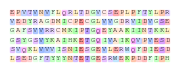

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, to_rgba
from matplotlib import cm

# Make sure the font is installed and recognized by your system
plt.rcParams['font.family'] = 'monospace'  # Use a generic family name
plt.rcParams['font.monospace'] = ['Courier New', 'Roboto Mono', 'Source Code Pro']  # Preferred fonts

if plotnumber >= 3:
    sequence_range = (0, 28)
else:
    sequence_range = (7, 20)  # Define the range of positions to analyze
sequence_length = sequence_range[1]- sequence_range[0]
num_sequences = len(degrons_seqs)  # Number of sequences

# Calculate amino acid frequencies
amino_acid_frequencies = {pos: {} for pos in range(sequence_range[0], sequence_range[1])}
for record in degrons_seqs:
    for i, amino_acid in enumerate(record):
        if i < sequence_range[0] or i >= sequence_range[1]:
            continue
        if amino_acid not in amino_acid_frequencies[i]:
            amino_acid_frequencies[i][amino_acid] = 0
        amino_acid_frequencies[i][amino_acid] += 1

for pos in amino_acid_frequencies:
    total = sum(amino_acid_frequencies[pos].values())
    for amino_acid in amino_acid_frequencies[pos]:
        amino_acid_frequencies[pos][amino_acid] /= total

# Define color dictionary for amino acids - pretty colors
aa_colors = {
    'A': '#FFDDC1', 'C': '#FFD1D1', 'D': '#FFABAB', 'E': '#FF8585',
    'F': '#C1FFD1', 'G': '#D1FFD1', 'H': '#C1FFAB', 'I': '#85FF85',
    'K': '#ABFF85', 'L': '#FFDD85', 'M': '#FFD185', 'N': '#FFC185',
    'P': '#FFAB85', 'Q': '#FF85FF', 'R': '#D1ABFF', 'S': '#D185FF',
    'T': '#AB85FF', 'V': '#85ABFF', 'W': '#85D1FF', 'Y': '#85FF85',
    'X': '#FFFFFF'  # for any unknown or non-standard amino acids
}

# Function to adjust color intensity
def adjust_color_intensity(color, intensity):
    base_color = to_rgba(color)
    return base_color[:3] + (intensity,)

# Create plot
fig, ax = plt.subplots(figsize=(sequence_plot_size))  # Size proportional to sequence elements
ax.set_yticks(range(num_sequences))
ax.set_yticklabels([record for record in degrons_seqs], va='center', style='italic')
ax.set_xticks(range(sequence_length))
ax.set_xticklabels(range(1, sequence_length + 1), rotation=90, ha='center')

# No axes for cleaner appearance
ax.axis('off')

x = sequence_range[0]

# Plot each amino acid with colored background
for j, record in enumerate(degrons_seqs):
    for i, amino_acid in enumerate(record):
        if i < sequence_range[0] or i >= sequence_range[1]:
            continue
        freq = amino_acid_frequencies[i].get(amino_acid, 0)
        color = adjust_color_intensity(aa_colors.get(amino_acid, '#FFFFFF'), freq**(1/2))
        ax.text(i-x, num_sequences - j-1, amino_acid, ha='center', va='center', color='black', fontsize=5, backgroundcolor=color, 
                 bbox=dict(boxstyle="square,pad=0", edgecolor=color, facecolor=color))

if plotnumber == 3:
    plt.savefig('degron_sequence_analysis_supplement/validated_sequence_alignment_hairpins_{}.pdf'.format(plotnumber))
elif plotnumber == 4:
    plt.savefig('degron_sequence_analysis_supplement/validated_sequence_alignment_helical_{}.pdf'.format(plotnumber))
elif plotnumber == 5:
    plt.savefig('degron_sequence_analysis_supplement/validated_sequence_alignment_c2h2_{}.pdf'.format(plotnumber))
elif plotnumber == 6:
    print('Plot number 6')
    plt.savefig('degron_sequence_analysis_supplement/validated_sequence_alignment_negatives_{}.pdf'.format(plotnumber))
elif plotnumber == 0: 
    plt.savefig('degron_sequence_analysis/kinase_sequence_alignment{}.pdf'.format(plotnumber))
elif plotnumber == 1: 
    plt.savefig('degron_sequence_analysis/gloop_sequence_alignment{}.pdf'.format(plotnumber))


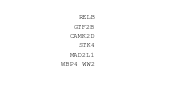

In [9]:
import matplotlib.pyplot as plt

# List of names to display
names = degrons_genes

if plotnumber == 1 or plotnumber== 3:
    # replace WBP4 in names by "WBP4 WW1"
    names = [name.replace('WBP4', 'WBP4 WW1') for name in names]
elif plotnumber == 6:
    # replace WBP4 in names by "WBP4 WW2"
    names = [name.replace('WBP4', 'WBP4 WW2') for name in names]

# Create a figure and an axes.
fig, ax = plt.subplots(figsize=label_plot_size)

# Hide the axes
ax.axis('off')

# Determine the vertical spacing based on the number of names
spacing = 1 / (len(names) + 1)
coordinates = [(0.5, 1 - (i + 1) * spacing) for i in range(len(names))]

# Plot each name at the specified coordinates
for (x, y), name in zip(coordinates, names):
    ax.text(x, y, name, fontsize=5, fontname='Courier New', ha='right')

# Show the plot

if plotnumber == 3:
    plt.savefig('degron_sequence_analysis_supplement/labels_validated_sequence_alignment_hairpins_{}.pdf'.format(plotnumber))
elif plotnumber == 4:
    plt.savefig('degron_sequence_analysis_supplement/labels_validated_sequence_alignment_helical_{}.pdf'.format(plotnumber))
elif plotnumber == 5:
    plt.savefig('degron_sequence_analysis_supplement/labels_validated_sequence_alignment_c2h2_{}.pdf'.format(plotnumber))
elif plotnumber == 6:
    plt.savefig('degron_sequence_analysis_supplement/labels_sequence_alignment_negatives{}.pdf'.format(plotnumber))
else: 
    plt.savefig('degron_sequence_analysis/labels_sequence_alignment{}.pdf'.format(plotnumber))


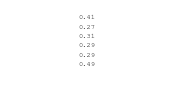

In [10]:
## Plot RMSds

import matplotlib.pyplot as plt

# List of names to display
rmsds = degrons_rmsds

# Create a figure and an axes.
fig, ax = plt.subplots(figsize=label_plot_size)

# Hide the axes
ax.axis('off')

# Determine the vertical spacing based on the number of names
spacing = 1 / (len(rmsds) + 1)
coordinates = [(0.5, 1 - (i + 1) * spacing) for i in range(len(rmsds))]

# Plot each name at the specified coordinates
for (x, y), rmsd in zip(coordinates, rmsds):
    if rmsd == 'N/A':
        ax.text(x, y, 'N/A', fontsize=5, fontname='Courier New', ha='right')
    else:
        ax.text(x, y, '{:.2f}'.format(rmsd), fontsize=5, fontname='Courier New', ha='right')

# Show the plot
if plotnumber == 3:
    plt.savefig('degron_sequence_analysis_supplement/rmsds_validated_sequence_alignment_hairpins_{}.pdf'.format(plotnumber))
elif plotnumber == 4:
    plt.savefig('degron_sequence_analysis_supplement/rmsds_validated_sequence_alignment_helical_{}.pdf'.format(plotnumber))
elif plotnumber == 5:
    plt.savefig('degron_sequence_analysis_supplement/rmsds_validated_sequence_alignment_c2h2_{}.pdf'.format(plotnumber))
elif plotnumber == 6:
    plt.savefig('degron_sequence_analysis_supplement/rmsds_sequence_alignment_negatives{}.pdf'.format(plotnumber))
else: 
    plt.savefig('degron_sequence_analysis/rmsds_sequence_alignment{}.pdf'.format(plotnumber))

In [12]:
import logomaker
import pandas as pd
import matplotlib.pyplot as plt

def make_logoplot(all_sequences, outfn, degron_range=(7, 20), plot_size=(0.65,0.5)):

    # Convert list of sequences into a DataFrame where each column represents a position in the sequence
    all_seqs = pd.DataFrame([list(seq)[degron_range[0]:degron_range[1]] for seq in all_sequences])

    print('Number of sequences used: ', all_seqs.shape)

    # Calculate the frequency of each base at each position
    freq_matrix = all_seqs.apply(lambda x: x.value_counts(normalize=True), axis=0).fillna(0)

    # Filter to keep only frequencies greater than 0.1
    threshold_freq_matrix = freq_matrix.apply(lambda x: x[x > 0.1], axis=0).fillna(0)

    # Create a logo from the filtered frequency matrix with a color scheme
    logo = logomaker.Logo(threshold_freq_matrix.T, font_name='Helvetica', color_scheme='chemistry')

    # Configure the plot
    logo.ax.set_xticklabels('')
    logo.ax.set_yticklabels('')

    style_sequence = ['.']*(degron_range[1] - degron_range[0])
    style_sequence = ''.join(style_sequence)

    # Set font sizes
    logo.style_glyphs_in_sequence(sequence=style_sequence,color='black', alpha=1, font_name='Helvetica', font_size=5)

    # make ticks invisible
    logo.ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    logo.ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

    # Remove upper and right borders
    logo.ax.spines['top'].set_visible(False)
    logo.ax.spines['right'].set_visible(False)
    logo.ax.spines['left'].set_visible(False)

    # Make the plot size 0.2x2 inches
    logo.ax.figure.set_size_inches(plot_size[0], plot_size[1])

    # Show plot
    #logo.fig.tight_layout()
    logo.fig.show()
    logo.fig.savefig(outfn, dpi=300)

Number of sequences used:  (6, 28)


/var/folders/nq/c118s1k508g8jf83mwb03yq40000gn/T/ipykernel_28025/1846140415.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  logo.fig.show()


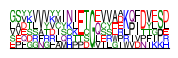

In [13]:
if plotnumber == 1: 
    make_logoplot(degrons_seqs, outfn='degron_sequence_analysis/logoplot_hairpin_validated.pdf', degron_range=(7,20), plot_size=(2.05, 0.5))
elif plotnumber == 0:
    make_logoplot(degrons_seqs, outfn='degron_sequence_analysis/logoplot_kinase_validated.pdf', degron_range=(7,20), plot_size=(2.05, 0.5))
if plotnumber == 5:
    make_logoplot(degrons_seqs, outfn='degron_sequence_analysis_supplement/logoplot_c2h2_validated.pdf', degron_range=(0,28), plot_size=(2.05, 0.5))
elif plotnumber == 4:
    make_logoplot(degrons_seqs, outfn='degron_sequence_analysis_supplement/logoplot_helical_validated.pdf', degron_range=(0,28), plot_size=(2.05, 0.5))

elif plotnumber == 3:
    make_logoplot(degrons_seqs, outfn='degron_sequence_analysis_supplement/logoplot_hairpin_validated.pdf', degron_range=(0,28), plot_size=(2.05, 0.5))
elif plotnumber == 6: 
    make_logoplot(degrons_seqs, outfn='degron_sequence_analysis_supplement/logoplot_negatives.pdf', degron_range=(0,28), plot_size=(2.05, 0.5))
